In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
books = pd.read_csv('/Users/priyachaudhuri/Desktop/SSB TERM 1/Data Science/Self/clean_books.csv')
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    350 non-null    object 
 1   author  350 non-null    object 
 2   rating  350 non-null    float64
 3   year    350 non-null    int64  
 4   genre   350 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 13.8+ KB


In [9]:
books.head()

,name,author,rating,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,2019,Childrens


In [14]:
#how many data points we have in each category
#books.value_counts('genre')
print(books['genre'].value_counts())

genre
Non Fiction    179
Fiction        131
Childrens       40
Name: count, dtype: int64


In [10]:
#gaining a quick understanding of data included in numerical columns
books.describe()

,rating,year
count,350.000000,350.000000
mean,4.608571,2013.508571
std,0.226941,3.284711
min,3.300000,2009.000000
25%,4.500000,2010.000000
50%,4.600000,2013.000000
75%,4.800000,2016.000000
max,4.900000,2019.000000


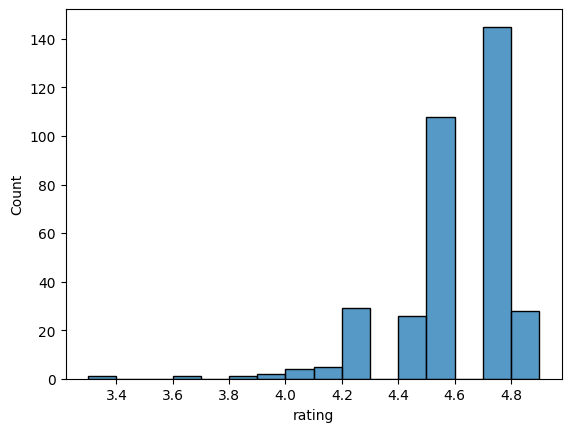

In [13]:
sns.histplot(data = books, x ='rating', binwidth = 0.1)
plt.show()

In [17]:
#the dot-astype function allows us to change data type
books['year'] = books['year'].astype(int)
books.dtypes

name       object
author     object
rating    float64
year        int64
genre      object
dtype: object

In [18]:
#We can validate categorical data by comparing values in a column to a list of expected valuees
#which can either be applied to a Series as we'll show here or to an entire DataFrame. 
# Let's check whether the values in the genre column are limited to "Fiction" and "Non Fiction" 

books['genre'].isin(['Fiction','Non-Fiction'])

0      False
1       True
2      False
3       True
4      False
       ...  
345    False
346     True
347    False
348     True
349    False
Name: genre, Length: 350, dtype: bool

In [19]:
#We can also use the tilde operator at the beginning of the code block to invert the 
# True/ False values so that the function returns True if the value is NOT in the list.

~books['genre'].isin(['Fiction','Non-Fiction'])


0       True
1      False
2       True
3      False
4       True
       ...  
345     True
346    False
347     True
348    False
349     True
Name: genre, Length: 350, dtype: bool

In [20]:
#We can select and view only the numerical columns in a DataFrame
books.select_dtypes("number").head()

,rating,year
0,4.7,2016
1,4.6,2011
2,4.7,2018
3,4.7,2017
4,4.8,2019


In [21]:
books['year'].min()

2009

In [22]:
books['year'].max()

2019

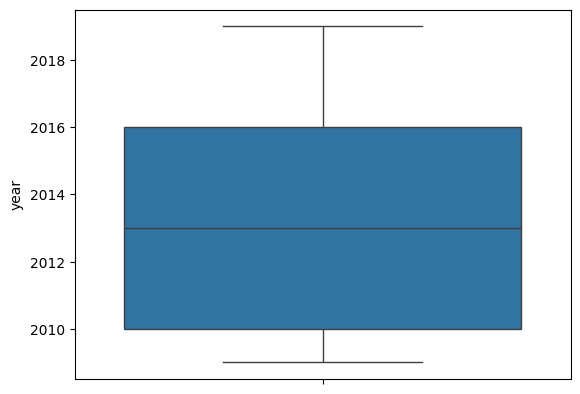

In [24]:
sns.boxplot(data = books, y = 'year')
plt.show()
#boxplot shows the boundaries of each quartile of year data: 
#as we saw using min and max, the lowest year is 2009 and the highest year is 2019. 
# The 25th and 75th percentiles are 2010 and 2016 and the median year is 2013.

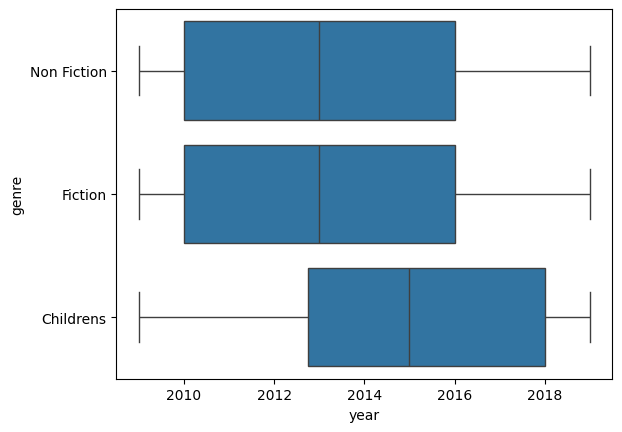

In [25]:
#We can also view the year data grouped by a categorical variable such as genre by setting the y keyword argument. 
sns.boxplot(data = books, x = 'year', y = 'genre')
plt.show()
# It looks like the children's books in our dataset have slightly later publishing years in general
# but the range of years is the same for all genres.

In [31]:
#We can explore the characteristics of subsets of data further
#groups data by a given category, allowing the user to chain an aggregating function

books.groupby('genre')['rating'].mean()

genre
Childrens      4.780000
Fiction        4.570229
Non Fiction    4.598324
Name: rating, dtype: float64

In [32]:
books.groupby('genre')['year'].mean()

genre
Childrens      2015.075000
Fiction        2013.022901
Non Fiction    2013.513966
Name: year, dtype: float64

In [37]:
#allows us to apply aggregating functions. 
# By default, it aggregates data across all rows in a given column
# ypically used when we want to apply more than one function. 

books['rating'].agg(["mean", "std"])

mean    4.608571
std     0.226941
Name: rating, dtype: float64

In [38]:
books['year'].agg(["mean", "std"])

mean    2013.508571
std        3.284711
Name: year, dtype: float64

In [39]:
books.agg({'rating': ['mean', 'std'], 'year': ['median']})

,rating,year
mean,4.608571,NaN
std,0.226941,NaN
median,NaN,2013.0


In [40]:
books.groupby('genre').agg(
    mean_rating = ('rating', 'mean'),
    std_rating = ('rating', 'std'),
    median_year = ('year', 'median')
)

,mean_rating,std_rating,median_year
genre,,,
Childrens,4.780000,0.122370,2015.0
Fiction,4.570229,0.281123,2013.0
Non Fiction,4.598324,0.179411,2013.0


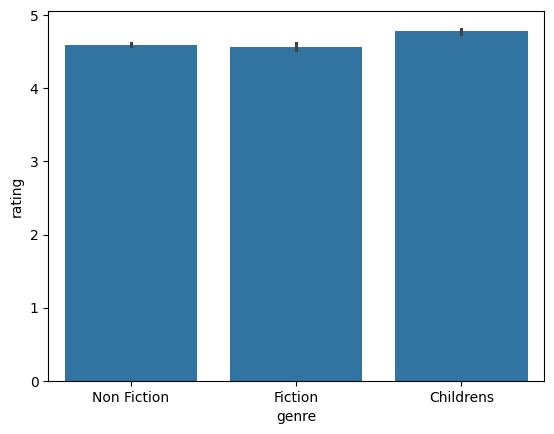

In [42]:
#bar plots will automatically calculate the mean of a quantitative variable like 
#rating across grouped categorical data, such as the genre category we've been looking at
sns.barplot(data = books, x = 'genre', y = 'rating')
plt.show()

#In Seaborn, bar plots also show a 95% confidence interval for the mean 
#as a vertical line on the top of each bar. 

In [44]:
salaries = pd.read_csv('/Users/priyachaudhuri/Desktop/SSB TERM 1/Data Science/Self/ds_salaries_clean.csv')
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Working_Year          607 non-null    int64  
 1   Designation           607 non-null    object 
 2   Experience            607 non-null    object 
 3   Employment_Status     607 non-null    object 
 4   Employee_Location     607 non-null    object 
 5   Company_Size          607 non-null    object 
 6   Remote_Working_Ratio  607 non-null    int64  
 7   Salary_USD            607 non-null    float64
dtypes: float64(1), int64(2), object(5)
memory usage: 38.1+ KB


In [45]:
#no of missing data
print(salaries.isna().sum())

Working_Year            0
Designation             0
Experience              0
Employment_Status       0
Employee_Location       0
Company_Size            0
Remote_Working_Ratio    0
Salary_USD              0
dtype: int64


In [46]:
#remove observations if they amount to five percent or less of all values. 
#If we have more missing values, instead of dropping them, we can replace them with the mean, median, or mode, depending on the context. 
#This is known as imputation.
#Alternatively, we can impute by sub-groups. 
#We saw that median salary varies by experience.
#so we could impute different salaries depending on experience.

In [48]:
threshold = len(salaries)*0.05
print(threshold)

30.35


In [51]:
cols_to_drop = salaries.columns[salaries.isna().sum() <= threshold]
print(cols_to_drop)

Index(['Working_Year', 'Designation', 'Experience', 'Employment_Status',
       'Employee_Location', 'Company_Size', 'Remote_Working_Ratio',
       'Salary_USD'],
      dtype='object')


In [52]:
salaries.dropna(subset = cols_to_drop, inplace = True)

In [53]:
cols_with_missing_values = salaries.columns[salaries.isna().sum() > 0]
print(cols_with_missing_values)

Index([], dtype='object')


In [54]:
#To impute the mode for the first three columns
#we loop through them and call the dot-fillna method
#passing the respective column's mode and indexing the first item
#which contains the mode, in square brackets.

for cols in cols_with_missing_values[:-1]:
    salries[col].fillna(salaries[col].mode()[0])

In [56]:
#impute median salary by experience level by grouping salaries by experience
#calculating the median
salaries_dict = salaries.groupby('Experience')["Salary_USD"].median().to_dict()
print(salaries_dict)

{'Entry': 53948.0, 'Executive': 163694.5, 'Mid': 73465.0, 'Senior': 129380.0}


In [57]:
salaries["Salary_USD"] = salaries["Salary_USD"].fillna(salaries["Experience"].map(salaries_dict))

In [60]:
print(salaries.select_dtypes('object').head())

                  Designation Experience Employment_Status Employee_Location  \
0              Data Scientist        Mid                FT                DE   
1  Machine Learning Scientist     Senior                FT                JP   
2           Big Data Engineer     Senior                FT                GB   
3        Product Data Analyst        Mid                FT                HN   
4   Machine Learning Engineer     Senior                FT                US   

  Company_Size  
0            L  
1            S  
2            M  
3            S  
4            L  


In [62]:
salaries["Designation"].value_counts()

Designation
Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                

In [64]:
# count unique values in a field
print(salaries["Designation"].nunique())

50


In [65]:
#search a column for a specific string or multiple strings. 

salaries["Designation"].str.contains("Scientist")

0       True
1       True
2      False
3      False
4      False
       ...  
602    False
603    False
604    False
605    False
606     True
Name: Designation, Length: 607, dtype: bool

In [66]:
salaries["Designation"].str.contains("Machine Learning|AI")

0      False
1       True
2      False
3      False
4       True
       ...  
602    False
603    False
604    False
605    False
606     True
Name: Designation, Length: 607, dtype: bool

In [69]:
#filter for job titles that start with a specific phrase such as "Data"
salaries["Designation"].str.contains("^Data")

0       True
1      False
2      False
3      False
4      False
       ...  
602     True
603     True
604     True
605     True
606    False
Name: Designation, Length: 607, dtype: bool

In [75]:
salaries.head()

,Working_Year,Designation,Experience,Employment_Status,Employee_Location,Company_Size,Remote_Working_Ratio,Salary_USD,Job_Category
0,2020,Data Scientist,Mid,FT,DE,L,0,76227.0,Other
1,2020,Machine Learning Scientist,Senior,FT,JP,S,0,248257.0,Other
2,2020,Big Data Engineer,Senior,FT,GB,M,50,104100.0,Other
3,2020,Product Data Analyst,Mid,FT,HN,S,0,19097.0,Other
4,2020,Machine Learning Engineer,Senior,FT,US,L,50,143225.0,Other


In [76]:
#list of job titles we want to find
job_categories = ['Data Science', 'Data Analytics', 'Data Engineering', 'Machine Learning','Managerial', 'Consultant']

data_science = "Data Scientist|NLP"
data_analyst = "Analyst|Analytics"
data_engineer = "Data Engineer|ETL|Architect|Infrastructure"
ml_engineer = "Machine Learning|ML|Big Data|AI"
manager = "Manager|Head|Director|Lead|Principal|Staff"
consultant = "Consultant|Freelance"

conditions = [
    (salaries["Designation"].str.contains(data_science)),
    (salaries["Designation"].str.contains(data_analyst)),
    (salaries["Designation"].str.contains(data_engineer)),
    (salaries["Designation"].str.contains(ml_engineer)),
    (salaries["Designation"].str.contains(manager)),
    (salaries["Designation"].str.contains(consultant))
]

salaries['Job_Category'] = np.select(conditions, job_categories, default = "Other")

print(salaries[["Designation", "Job_Category"]].head())



                  Designation      Job_Category
0              Data Scientist      Data Science
1  Machine Learning Scientist  Machine Learning
2           Big Data Engineer  Data Engineering
3        Product Data Analyst    Data Analytics
4   Machine Learning Engineer  Machine Learning


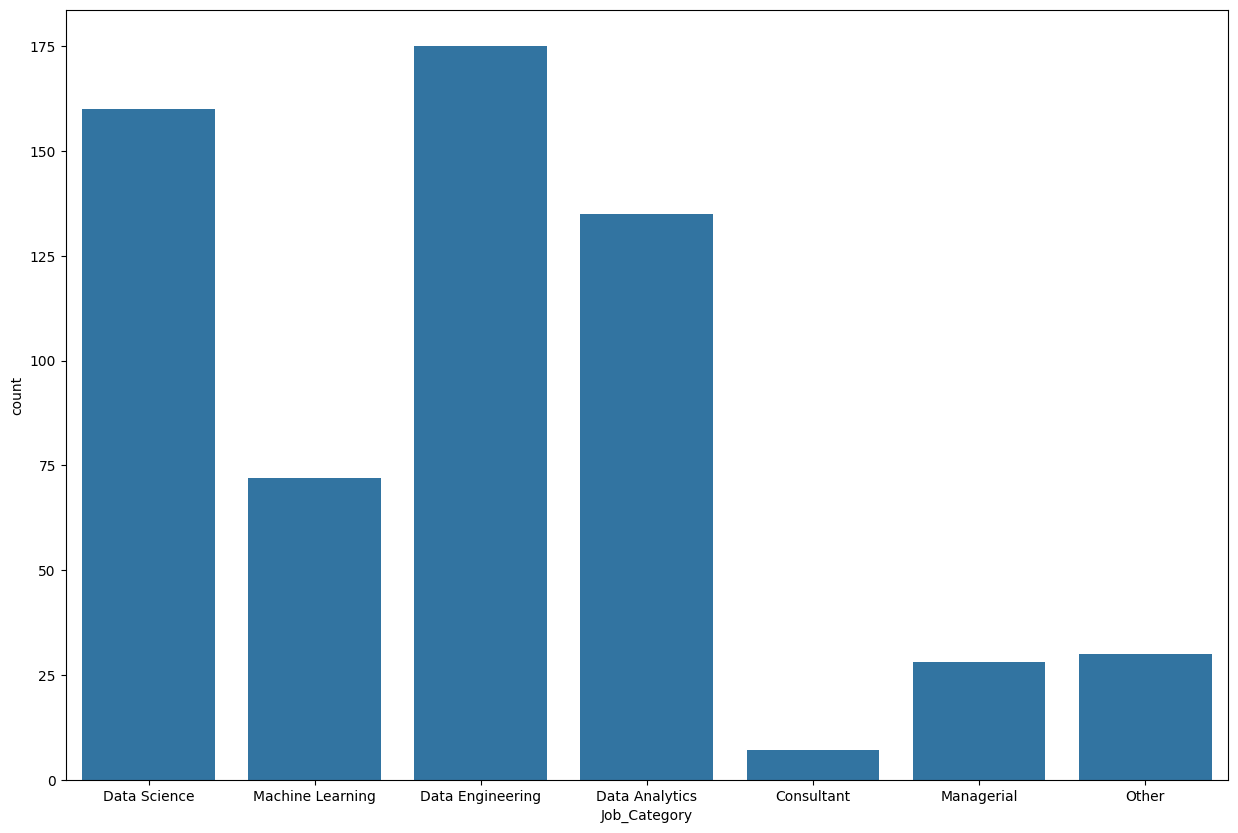

In [80]:
plt.figure(figsize = (15,10))
sns.countplot(data = salaries, x = "Job_Category")
plt.show()